In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('exercise_02_train.csv')

## Initial Data Exploration

In [97]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,0.198560,74.425320,67.627745,-3.095111,-6.822327,19.048071,-0.362378,-10.699174,-22.699791,-1.561262,...,0.800948,1.553846,asia,-1.093926,16.202557,26.238591,-2.125570,9.644466,1.237667,0
1,-29.662621,24.320711,-48.205182,1.430339,-6.552206,4.263074,6.551412,4.265483,1.245095,2.246814,...,2.031707,7.544422,asia,-3.659541,29.674259,-15.141647,-36.030599,5.820376,1.952183,1
2,15.493759,-66.160459,50.512903,-2.265792,14.428578,2.509323,-6.707536,3.820842,-11.100833,-1.459825,...,-0.992474,1.385799,america,1.299144,33.018090,-19.914894,26.212736,2.372690,0.558988,1
3,-19.837651,33.210943,53.405563,1.079462,11.364251,-1.064581,9.308857,9.266076,14.552959,-2.012755,...,-1.157845,6.036804,asia,0.521396,9.664095,-27.197636,19.221130,13.382712,0.214462,0
4,11.896655,-26.717872,-17.758176,1.692017,21.553537,-5.852097,-0.857435,-2.186940,18.075272,-1.404618,...,-3.045511,-1.719337,asia,1.526071,-25.608326,33.383803,-5.703269,-11.023730,-1.191319,0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, x0 to y
dtypes: float64(94), int64(1), object(6)
memory usage: 30.8+ MB


In [99]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x94,x95,x96,x97,x98,x99,y
count,39989.000000,39990.000000,39992.000000,39991.000000,39992.000000,39994.000000,39990.000000,39991.000000,39994.000000,39993.000000,...,39993.000000,39996.000000,39993.000000,39992.000000,39992.000000,39985.000000,39987.000000,39994.000000,39987.000000,40000.00000
mean,3.446069,-7.788884,1.706058,-0.072972,0.123077,-0.608624,0.035576,-0.052651,-2.909764,-0.024265,...,-9.002636,-0.001751,-0.005731,-0.014064,-0.095040,-0.807556,-2.514305,0.038370,0.043218,0.20360
std,16.247547,37.014862,38.385085,1.503243,16.289994,15.585122,9.041371,6.953403,13.149006,2.939895,...,96.666843,2.626840,4.605320,2.166326,27.516763,23.836194,18.554646,8.450995,1.114444,0.40268
min,-60.113902,-157.341119,-163.339956,-6.276969,-61.632319,-62.808995,-35.060656,-26.736717,-53.735586,-11.497395,...,-422.711982,-10.179216,-20.044113,-9.396153,-125.064735,-108.474714,-73.908741,-35.416133,-4.376614,0.00000
25%,-7.602474,-32.740989,-24.141605,-1.088182,-10.896241,-11.183089,-6.090255,-4.747798,-11.722776,-2.004215,...,-73.209185,-1.777981,-3.113418,-1.491537,-18.465082,-16.826144,-15.026614,-5.645656,-0.710712,0.00000
50%,3.448865,-8.019993,1.963977,-0.062389,0.104277,-0.574567,0.046812,-0.037727,-2.941234,-0.054526,...,-6.884549,-0.019422,-0.007618,-0.012195,0.099472,-0.651197,-2.509525,0.023663,0.042663,0.00000
75%,14.266716,16.853383,27.516500,0.940612,11.078565,9.955357,6.100903,4.637982,5.865014,1.955100,...,56.676810,1.761629,3.100729,1.450074,18.514579,15.275896,9.889591,5.728781,0.797856,0.00000
max,75.311659,153.469221,154.051060,5.837559,65.949709,63.424046,45.053946,34.267792,66.936936,11.271939,...,378.752405,11.295740,19.414284,9.136848,112.390710,92.926545,76.120119,34.170189,4.490209,1.00000


In [15]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

x96    0.0375
x63    0.0350
x13    0.0350
x18    0.0350
x85    0.0350
x24    0.0350
x62    0.0325
x35    0.0325
x21    0.0325
x69    0.0325
x97    0.0325
x99    0.0325
x42    0.0300
x60    0.0300
x65    0.0300
x73    0.0300
x17    0.0300
x25    0.0275
x51    0.0275
x56    0.0275
x0     0.0275
x55    0.0275
x89    0.0275
x12    0.0275
x86    0.0275
x28    0.0275
x76    0.0250
x75    0.0250
x48    0.0250
x1     0.0250
        ...  
x98    0.0150
x5     0.0150
x8     0.0150
x22    0.0150
x79    0.0150
x53    0.0150
x83    0.0125
x20    0.0125
x71    0.0125
x70    0.0125
x64    0.0125
x54    0.0125
x45    0.0125
x29    0.0125
x37    0.0100
x41    0.0100
x91    0.0100
x32    0.0100
x88    0.0100
x30    0.0100
x87    0.0100
x81    0.0100
x47    0.0100
x15    0.0100
x84    0.0075
x14    0.0075
x49    0.0075
x44    0.0050
x43    0.0050
y      0.0000
Length: 101, dtype: float64

#### Very few missing data points, the column with the most is only missing 0.0375% of its data. In the data cleansing process, the goal will be to impute the missing data by adding its mean if its numerical data. If its categorical, we might just have to drop those rows.

## Handling Missing Data

In [19]:
#Checking the six columns with data type as object
df.select_dtypes(include='object')

,x34,x35,x41,x45,x68,x93
0,Toyota,wed,$449.48,0.0%,Jun,asia
1,Honda,wed,$-525.06,0.0%,sept.,asia
2,bmw,wed,$-599.5,0.01%,Oct,america
3,volkswagon,wed,$-220.71,-0.0%,Jun,asia
4,volkswagon,thurday,$-1405.59,-0.0%,July,asia
5,Toyota,wed,$35.23,-0.01%,Aug,asia
6,bmw,wed,$1296.85,-0.02%,Aug,asia
7,Honda,wednesday,$421.92,-0.01%,Aug,asia
8,Toyota,wed,$-83.94,-0.01%,Apr,asia
9,Toyota,thur,$1391.32,0.0%,Jun,asia


In [20]:
#Turns out 2 of the object columns are actually numerical, will convert them

In [5]:
df['x41'] = df['x41'].replace('[\$,]', '', regex=True).astype(float)

In [6]:
df['x45'] = df['x45'].replace('[\%,]', '', regex=True).astype(float)

In [7]:
df.select_dtypes(include='object').isnull().sum()

x34     7
x35    13
x68     8
x93     7
dtype: int64

#### Since there are relatively small amounts of missing data for categorical columns, I think its fine to drop them off the 40k rows. Assuming all the missing values are in different rows, the max loss of data would be 35 rows, which represents 0.0875% of the total.

In [8]:
df = df.dropna(subset = ['x34','x35','x68','x93'])

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39965 entries, 0 to 39999
Columns: 101 entries, x0 to y
dtypes: float64(96), int64(1), object(4)
memory usage: 31.1+ MB


In [30]:
#35 rows lost

#### Now that the categorical columns aren't missing data, I'll replace the missing values of the numerical columns with their respective mean

In [9]:
for column in df.select_dtypes(include=['int64','float64']).apply(lambda x: x.fillna(x.mean()),axis=0):
    df[column] = df.select_dtypes(include=['int64','float64']).apply(lambda x: x.fillna(x.mean()),axis=0)[column]

In [135]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,0.198560,74.425320,67.627745,-3.095111,-6.822327,19.048071,-0.362378,-10.699174,-22.699791,-1.561262,...,0.800948,1.553846,asia,-1.093926,16.202557,26.238591,-2.125570,9.644466,1.237667,0
1,-29.662621,24.320711,-48.205182,1.430339,-6.552206,4.263074,6.551412,4.265483,1.245095,2.246814,...,2.031707,7.544422,asia,-3.659541,29.674259,-15.141647,-36.030599,5.820376,1.952183,1
2,15.493759,-66.160459,50.512903,-2.265792,14.428578,2.509323,-6.707536,3.820842,-11.100833,-1.459825,...,-0.992474,1.385799,america,1.299144,33.018090,-19.914894,26.212736,2.372690,0.558988,1
3,-19.837651,33.210943,53.405563,1.079462,11.364251,-1.064581,9.308857,9.266076,14.552959,-2.012755,...,-1.157845,6.036804,asia,0.521396,9.664095,-27.197636,19.221130,13.382712,0.214462,0
4,11.896655,-26.717872,-17.758176,1.692017,21.553537,-5.852097,-0.857435,-2.186940,18.075272,-1.404618,...,-3.045511,-1.719337,asia,1.526071,-25.608326,33.383803,-5.703269,-11.023730,-1.191319,0


In [107]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

y      0.0
x36    0.0
x26    0.0
x27    0.0
x28    0.0
x29    0.0
x30    0.0
x31    0.0
x32    0.0
x33    0.0
x34    0.0
x35    0.0
x37    0.0
x49    0.0
x38    0.0
x39    0.0
x40    0.0
x41    0.0
x42    0.0
x43    0.0
x44    0.0
x45    0.0
x46    0.0
x47    0.0
x25    0.0
x24    0.0
x23    0.0
x22    0.0
x1     0.0
x2     0.0
      ... 
x95    0.0
x96    0.0
x97    0.0
x98    0.0
x76    0.0
x75    0.0
x74    0.0
x73    0.0
x52    0.0
x53    0.0
x54    0.0
x55    0.0
x56    0.0
x57    0.0
x58    0.0
x59    0.0
x60    0.0
x61    0.0
x62    0.0
x63    0.0
x64    0.0
x65    0.0
x66    0.0
x67    0.0
x68    0.0
x69    0.0
x70    0.0
x71    0.0
x72    0.0
x0     0.0
Length: 101, dtype: float64

In [66]:
#No empty data points

#### Now I'll check the categorical variables to make sure its clean before making them dummies to make them numerical

In [136]:
#Columns with categorical data
df.select_dtypes(include='object').isnull().sum()

x34    0
x35    0
x68    0
x93    0
dtype: int64

In [69]:
df['x34'].value_counts()

volkswagon    12447
Toyota        11071
bmw            7276
Honda          5176
tesla          2245
chrystler      1219
nissan          334
ford            159
mercades         27
chevrolet        11
Name: x34, dtype: int64

In [70]:
df['x35'].value_counts()

wed          14785
thurday      13366
wednesday     5915
thur          4383
tuesday        894
friday         537
monday          61
fri             24
Name: x35, dtype: int64

In [71]:
df['x68'].value_counts()

July       11072
Jun         9251
Aug         8208
May         4767
sept.       3482
Apr         1613
Oct          904
Mar          431
Nov          151
Feb           56
Dev           20
January       10
Name: x68, dtype: int64

In [72]:
df['x93'].value_counts()

asia       35395
america     3126
euorpe      1444
Name: x93, dtype: int64

#### There are some typos to correct, but only column x35 has values to be corrected because of duplication

In [10]:
df['x35'] = df['x35'].apply(lambda x: 'wednesday' if x=='wed' else x)
df['x35'] = df['x35'].apply(lambda x: 'thursday' if x=='thur' else x)
df['x35'] = df['x35'].apply(lambda x: 'thursday' if x=='thurday' else x)
df['x35'] = df['x35'].apply(lambda x: 'friday' if x=='fri' else x)

In [11]:
df['x35'].value_counts()

wednesday    20700
thursday     17749
tuesday        894
friday         561
monday          61
Name: x35, dtype: int64

In [12]:
#Some typo corrections, nothing to do with the analysis
df['x68'] = df['x68'].apply(lambda x: 'Sep' if x=='sept.' else x)
df['x68'] = df['x68'].apply(lambda x: 'Dec' if x=='Dev' else x)
df['x68'] = df['x68'].apply(lambda x: 'Jan' if x=='January' else x)
df['x93'] = df['x93'].apply(lambda x: 'Europe' if x=='euorpe' else x)

#### Data is clean now, feature engineering is up next

## Feature Engineering

#### The first step is to check for outliers. Since there are so many columns, a visual analysis wouldn't be practical. Instead I'll apply a function that caps values per column to a max of IQR*1.5, helping prevents extreme values from skewing the model too much.

In [15]:
df_num = df.select_dtypes(include=['int64','float64'])
df_num = df.select_dtypes(include=['int64','float64']).loc[:, df_num.columns != 'y']

In [16]:
for column in df_num.columns.tolist():
    q75, q25 = np.percentile(df[column], [75 ,25])
    iqr = q75 - q25
    min_value = q25 - (iqr*1.5)
    max_value = q75 + (iqr*1.5)
    df[column] = df[column].apply(lambda x:max_value if x > max_value else x)
    df[column] = df[column].apply(lambda x:min_value if x < min_value else x)

#### Now that the outliers were capped, normalization will scale down the values between 0 and 1, so the data can be comparable apples to apples, so to speak.

In [17]:
df_norm = (df_num - df_num.mean()) / (df_num.max() - df_num.min())

In [18]:
df_clean = pd.merge(df_norm,df.select_dtypes(include='object'), right_index=True, left_index=True)

In [19]:
df_clean['y']=df['y']

#### Next step is to get dummies from the categorical variables, to convert them into numerical so the model can use them as input

In [20]:
df_clean = pd.get_dummies(df_clean)

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39965 entries, 0 to 39999
Columns: 127 entries, x0 to x93_asia
dtypes: float64(96), int64(1), uint8(30)
memory usage: 32.3 MB


#### The data transformation added 26 columns, which adds to the complexity of the model. However, with almost 40k rows, there should be enough data to compensate for the extra columns.

## Modeling

In [24]:
df_clean['y'].value_counts()

0    31826
1     8139
Name: y, dtype: int64

#### The target variable is unbalanced, with a lot more cases for class 0. After the train test split, I will rebalance the train set using SMOTE, without touching the test set.

In [22]:
#Train Test Split
X = df_clean.drop(['y'],axis=1)
Y = df_clean['y']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [67]:
# Applying SMOTE to generate synthetic samples of the minority class to create balance
sm = SMOTE()
X_upsampled, y_upsampled = sm.fit_sample(X_train, y_train)

In [68]:
np.bincount(y_upsampled)

array([22322, 22322], dtype=int64)

#### The classes are balanced now, the models will be able to learn equally from both classes.

#### Logistic Regression

In [109]:
logreg = LogisticRegression()

In [110]:
logreg.fit(X_upsampled, y_upsampled)
y_pred_logreg = logreg.predict(X_test)

In [111]:
cross_val_score(logreg, X_upsampled, y_upsampled, cv=10)

array([0.82445141, 0.83318406, 0.85035842, 0.85080645, 0.85259857,
       0.86603943, 0.859319  , 0.85058244, 0.85640681, 0.85707885])

In [112]:
confusion_matrix(y_test, y_pred_logreg)

array([[8069, 1435],
       [ 474, 2012]], dtype=int64)

In [113]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_logreg).ravel()

In [114]:
sensitivity_logreg = tp / (tp+fn)
specificity_logreg = tn / (tn+fp)
print('Sensitivity: '+ str(sensitivity_logreg))
print('Specificity: '+ str(specificity_logreg))

Sensitivity: 0.8093322606596943
Specificity: 0.8490109427609428


In [73]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      9504
           1       0.58      0.81      0.68      2486

    accuracy                           0.84     11990
   macro avg       0.76      0.83      0.79     11990
weighted avg       0.87      0.84      0.85     11990



#### The logistic regression model performed pretty well with an accuracy of 84%. However, it wasn't as good at predicting the minority class, even with the upsampling. The F1 score was 89% for the majority class vs 68% for the minority. This drop is caused by low precision for the minority class, with a level of 58%, so the model isn't good at telling apart true and false positives.

#### It doesn't seem to be overfitted, so it should do well with new data. However, it might have trouble providing accurate predictions if the minority class of this data set happens to be the majority class of the new one. The accuracy would be much lower is my guess. 

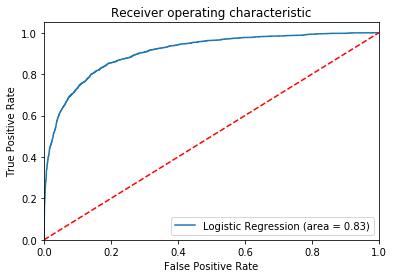

In [74]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Random Forest

In [64]:
rfc = ensemble.RandomForestClassifier(n_estimators=100)

In [65]:
rfc.fit(X_upsampled, y_upsampled)
y_pred_rfc = rfc.predict(X_test)

In [66]:
cross_val_score(rfc, X_upsampled, y_upsampled, cv=10)

array([0.94424541, 0.94111061, 0.96460573, 0.98521505, 0.98812724,
       0.9874552 , 0.98521505, 0.98566308, 0.98812724, 0.98454301])

In [99]:
confusion_matrix(y_test, y_pred_rfc)

array([[9321,  183],
       [ 702, 1784]], dtype=int64)

In [102]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rfc).ravel()

In [105]:
sensitivity_rfc = tp / (tp+fn)
specificity_rfc = tn / (tn+fp)
print('Sensitivity: '+ str(sensitivity_rfc))
print('Specificity: '+ str(specificity_rfc))

Sensitivity: 0.7176186645213194
Specificity: 0.9807449494949495


In [77]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9504
           1       0.91      0.72      0.80      2486

    accuracy                           0.93     11990
   macro avg       0.92      0.85      0.88     11990
weighted avg       0.93      0.93      0.92     11990



#### The random forest model performed extremely well with an overall accuracy of 93%. However, it still underperformed when predicting the minority class, with an F1 score of 80% vs 95% for the majority. Its precision was very high and even between classes, but the recall was not.   

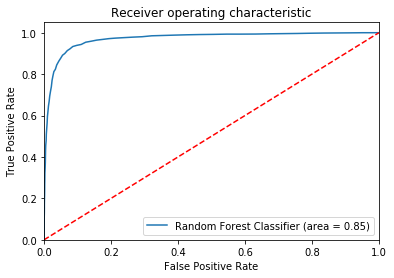

In [78]:
rfc_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Comparing sensitivity and specificity

#### Logistic Regression
#### Sensitivity: 0.809 Specificity: 0.849
#### Random Forest
#### Sensitivity: 0.718 Specificity: 0.981

#### The random forest model was more accurate overall, but the logistic regression model has a higher sensitivity, so the business case would determine which model would be chosen. Logistic regression is better at predicting actual ocurrences of what we are modeling, but the random forest is better in overall accuracy and at predicting negative ocurrences.


### Comparing ROC Curves

#### Both curves have similar areas, but the Random forest is slanted to the upper left more and has a higher area, so according to this method, it is the better model.

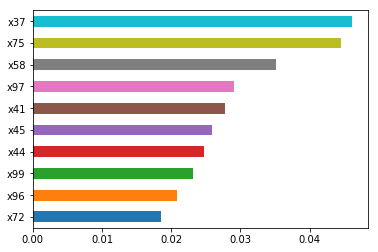

In [79]:
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns).sort_values()
feat_importances[-10:].plot(kind='barh')

## Predictions for the test file

In [170]:
df_test = pd.read_csv('exercise_02_test.csv')

In [171]:
df_test.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,6.625366,54.479467,15.285444,-0.794648,22.498346,-29.212209,1.435134,-4.551934,5.930404,-3.319388,...,-18.919238,1.774657,2.216406,america,0.987554,34.396477,-55.883515,13.739194,2.824056,1.141799
1,3.796927,-20.244923,-18.084196,-1.113454,-3.551728,-4.025589,1.971885,-1.965186,13.210722,-4.262240,...,33.878264,-1.027421,7.924785,asia,2.615088,15.038461,-13.110477,-13.018951,-5.069025,0.568757
2,31.875080,-61.467354,14.943580,0.979055,6.796937,-29.708041,4.778812,-2.682217,-17.122526,0.903299,...,-28.553940,1.755786,-0.325669,asia,-0.986222,-1.769850,-7.140415,0.791425,-3.224037,-0.816682
3,15.266588,-18.454831,1.105534,-2.718771,-5.511702,2.252314,-8.017649,3.635776,-13.024884,-1.751722,...,14.380384,-0.756253,5.930171,asia,-2.199690,-16.389740,-2.564346,-16.716012,5.559949,0.603007
4,-17.616761,15.810515,-17.972025,-1.995724,-23.112552,-15.899861,-17.054154,4.097427,-7.755402,-2.553410,...,-22.999896,-1.364063,1.207973,asia,1.694508,-4.086831,-28.709156,23.003355,-4.358594,1.929231


#### I'll have to perform the same preprocessing techniques to the new data before inputting into the model

In [172]:
df_test.isnull().sum().sort_values(ascending=False)/len(df)*100

x55    0.015013
x5     0.012511
x15    0.012511
x87    0.012511
x79    0.010009
x3     0.010009
x7     0.010009
x94    0.010009
x46    0.010009
x48    0.010009
x77    0.007507
x74    0.007507
x68    0.007507
x62    0.007507
x49    0.007507
x52    0.007507
x78    0.007507
x42    0.007507
x32    0.007507
x13    0.007507
x44    0.007507
x0     0.007507
x99    0.005004
x89    0.005004
x31    0.005004
x21    0.005004
x51    0.005004
x24    0.005004
x47    0.005004
x88    0.005004
         ...   
x58    0.002502
x73    0.002502
x71    0.002502
x70    0.002502
x69    0.002502
x67    0.002502
x64    0.002502
x63    0.002502
x83    0.002502
x59    0.002502
x56    0.002502
x76    0.002502
x54    0.002502
x2     0.002502
x85    0.002502
x98    0.002502
x86    0.002502
x95    0.002502
x39    0.002502
x8     0.002502
x97    0.000000
x4     0.000000
x80    0.000000
x25    0.000000
x35    0.000000
x43    0.000000
x50    0.000000
x53    0.000000
x84    0.000000
x38    0.000000
Length: 100, dtype: floa

In [173]:
df_test.select_dtypes(include='object')

,x34,x35,x41,x45,x68,x93
0,volkswagon,wed,$2475.46,-0.01%,Aug,america
1,bmw,thurday,$-1109.1,0.0%,Jun,asia
2,volkswagon,thurday,$-187.7,-0.0%,sept.,asia
3,Toyota,wednesday,$525.65,0.01%,July,asia
4,Toyota,thurday,$-1113.53,0.0%,Apr,asia
5,Toyota,wednesday,$-1232.97,0.0%,Jun,asia
6,Toyota,wednesday,$1019.79,0.01%,May,asia
7,Toyota,wed,$-948.35,-0.01%,May,asia
8,volkswagon,wednesday,$-30.8,-0.01%,Jun,asia
9,Toyota,thurday,$-1214.51,-0.01%,July,asia


In [174]:
# Issues look very similar to the training data set

In [175]:
df_test['x41'] = df_test['x41'].replace('[\$,]', '', regex=True).astype(float)
df_test['x45'] = df_test['x45'].replace('[\%,]', '', regex=True).astype(float)

In [176]:
df_test.select_dtypes(include='object').isnull().sum()

x34    2
x35    0
x68    3
x93    1
dtype: int64

#### Not dropping these empty rows since the instructions call for 10k results. The get dummies method will turn the empty categorical values into zeros

In [177]:
# Replace empty values with their respective column means
for column in df_test.select_dtypes(include=['int64','float64']).apply(lambda x: x.fillna(x.mean()),axis=0):
    df_test[column] = df_test.select_dtypes(include=['int64','float64']).apply(lambda x: x.fillna(x.mean()),axis=0)[column]

In [178]:
# No empty values
df_test.isnull().sum().sort_values(ascending=False)/len(df)*100

x68    0.007507
x34    0.005004
x93    0.002502
x99    0.000000
x35    0.000000
x26    0.000000
x27    0.000000
x28    0.000000
x29    0.000000
x30    0.000000
x31    0.000000
x32    0.000000
x33    0.000000
x36    0.000000
x24    0.000000
x37    0.000000
x38    0.000000
x39    0.000000
x40    0.000000
x41    0.000000
x42    0.000000
x43    0.000000
x44    0.000000
x45    0.000000
x46    0.000000
x25    0.000000
x23    0.000000
x48    0.000000
x22    0.000000
x1     0.000000
         ...   
x92    0.000000
x94    0.000000
x95    0.000000
x96    0.000000
x97    0.000000
x75    0.000000
x74    0.000000
x73    0.000000
x60    0.000000
x51    0.000000
x52    0.000000
x53    0.000000
x54    0.000000
x55    0.000000
x56    0.000000
x57    0.000000
x58    0.000000
x59    0.000000
x61    0.000000
x72    0.000000
x62    0.000000
x63    0.000000
x64    0.000000
x65    0.000000
x66    0.000000
x67    0.000000
x69    0.000000
x70    0.000000
x71    0.000000
x0     0.000000
Length: 100, dtype: floa

In [179]:
df_test['x34'].value_counts()

volkswagon    3234
Toyota        2616
bmw           1844
Honda         1293
tesla          583
chrystler      281
nissan          95
ford            40
mercades        10
chevrolet        2
Name: x34, dtype: int64

In [180]:
df_test['x35'].value_counts()

wed          3745
thurday      3285
wednesday    1496
thur         1117
tuesday       218
friday        121
monday         13
fri             5
Name: x35, dtype: int64

In [181]:
df_test['x68'].value_counts()

July       2775
Jun        2385
Aug        1964
May        1208
sept.       868
Apr         437
Oct         228
Mar          82
Nov          36
Feb           6
Dev           5
January       3
Name: x68, dtype: int64

In [182]:
df_test['x93'].value_counts()

asia       8868
america     788
euorpe      343
Name: x93, dtype: int64

In [183]:
df_test['x35'] = df_test['x35'].apply(lambda x: 'wednesday' if x=='wed' else x)
df_test['x35'] = df_test['x35'].apply(lambda x: 'thursday' if x=='thur' else x)
df_test['x35'] = df_test['x35'].apply(lambda x: 'thursday' if x=='thurday' else x)
df_test['x35'] = df_test['x35'].apply(lambda x: 'friday' if x=='fri' else x)

In [184]:
df_test['x35'].value_counts()

wednesday    5241
thursday     4402
tuesday       218
friday        126
monday         13
Name: x35, dtype: int64

In [185]:
df_test['x68'] = df_test['x68'].apply(lambda x: 'Sep' if x=='sept.' else x)
df_test['x68'] = df_test['x68'].apply(lambda x: 'Dec' if x=='Dev' else x)
df_test['x68'] = df_test['x68'].apply(lambda x: 'Jan' if x=='January' else x)
df_test['x93'] = df_test['x93'].apply(lambda x: 'Europe' if x=='euorpe' else x)

In [186]:
# Feature Engineering
df_num_test = df_test.select_dtypes(include=['int64','float64'])

In [187]:
# Capping outliers
for column in df_num_test.columns.tolist():
    q75, q25 = np.percentile(df_test[column], [75 ,25])
    iqr = q75 - q25
    min_value = q25 - (iqr*1.5)
    max_value = q75 + (iqr*1.5)
    df_test[column] = df_test[column].apply(lambda x:max_value if x > max_value else x)
    df_test[column] = df_test[column].apply(lambda x:min_value if x < min_value else x)

In [188]:
# Normalizing the data
df_norm_test = (df_num_test - df_num_test.mean()) / (df_num_test.max() - df_num_test.min())

In [189]:
df_clean_test = pd.merge(df_norm_test,df_test.select_dtypes(include='object'), right_index=True, left_index=True)

In [190]:
df_clean_test = pd.get_dummies(df_clean_test)

In [191]:
df_clean_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 126 entries, x0 to x93_asia
dtypes: float64(96), uint8(30)
memory usage: 7.6 MB


## Predictions

In [192]:
logreg.predict_proba(df_clean_test)[:,1]

array([0.70522843, 0.26112738, 0.48528282, ..., 0.09342228, 0.28607664,
       0.0572792 ])

In [195]:
rfc.predict_proba(df_clean_test)[:,1]

array([0.4 , 0.34, 0.18, ..., 0.13, 0.28, 0.27])

In [199]:
np.savetxt('results1.csv', logreg.predict_proba(df_clean_test)[:,1], delimiter=",")

In [200]:
np.savetxt('results2.csv', rfc.predict_proba(df_clean_test)[:,1], delimiter=",")